# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

*Start writing report here..*

['Email + Call' 'Call' 'Email' 'em + call' 'email']
['Kansas' 'Wisconsin' 'Illinois' 'Mississippi' 'Georgia' 'Oklahoma'
 'Massachusetts' 'Missouri' 'Texas' 'New York' 'Maryland' 'California'
 'Tennessee' 'North Dakota' 'Florida' 'Michigan' 'North Carolina'
 'Pennsylvania' 'Indiana' 'Hawaii' 'Colorado' 'Louisiana' 'Virginia'
 'Arkansas' 'Alaska' 'Oregon' 'New Hampshire' 'Ohio' 'New Jersey'
 'Connecticut' 'Iowa' 'Montana' 'Washington' 'Arizona' 'Kentucky'
 'Alabama' 'Nebraska' 'South Carolina' 'Minnesota' 'South Dakota' 'Maine'
 'Utah' 'West Virginia' 'Vermont' 'New Mexico' 'Rhode Island' 'Nevada'
 'Delaware' 'Idaho' 'Wyoming']
[6 5 3 4 1 2]
       week sales_method  ... nb_site_visits       state
13741     2        Email  ...             24  California
13800     4         Call  ...             27  California

[2 rows x 8 columns]
0     1348
1     2336
2     1841
3     1500
4     1232
5     1042
6      856
7      661
8      555
9      476
10     376
11     301
12     267
13     230
14   

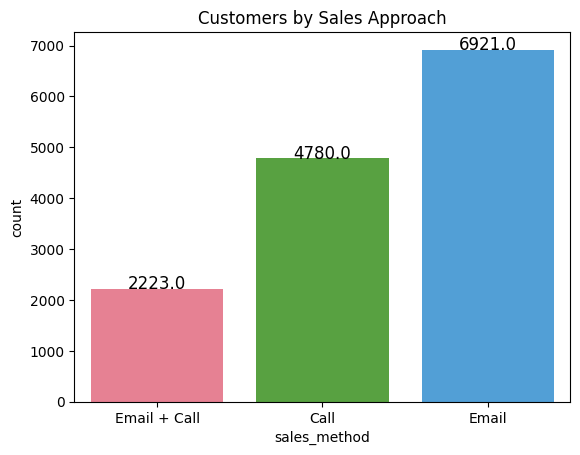

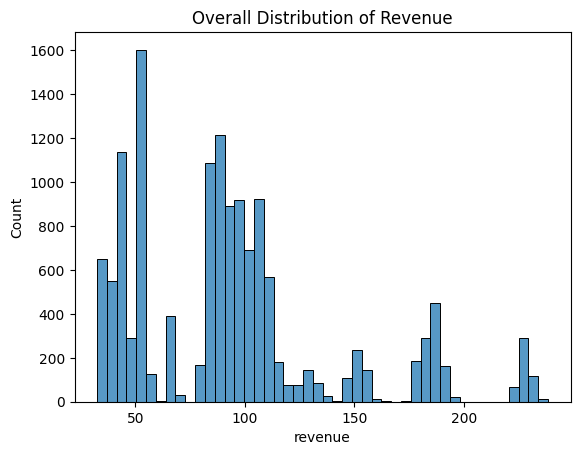

   sales_method    revenue
0          Call  227513.02
2  Email + Call  408256.69
1         Email  672220.61


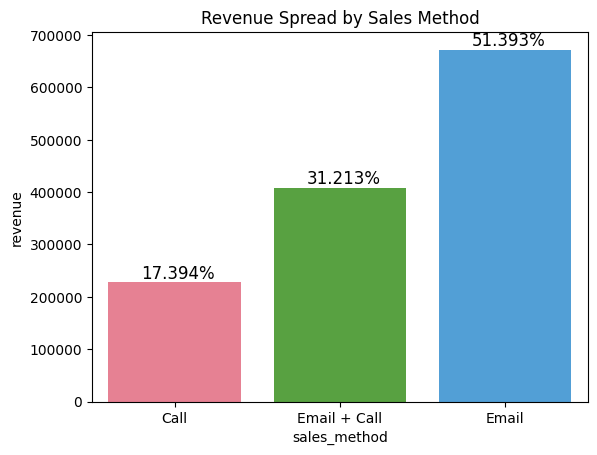

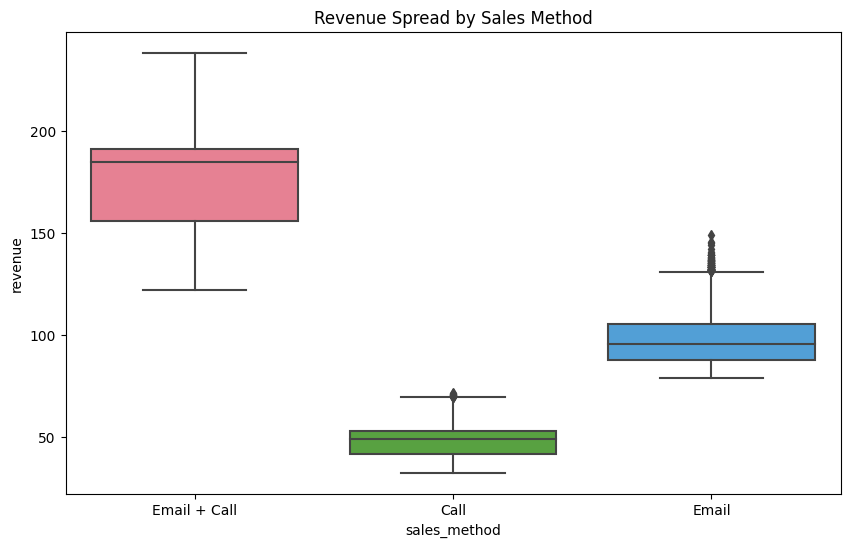

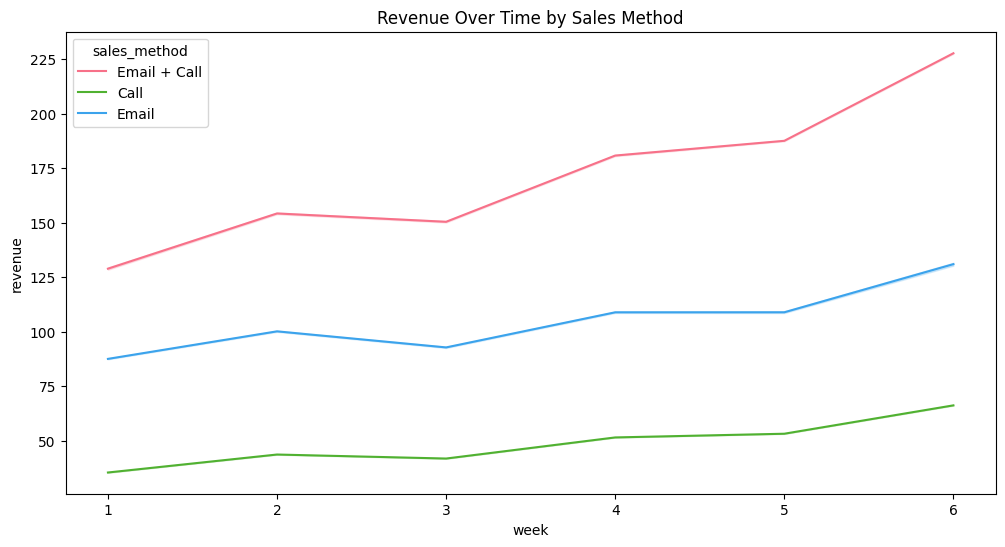


Revenue per Customer (Initial Values):
sales_method
Call             5.013627
Email           10.002010
Email + Call    15.074874
Name: revenue_per_customer, dtype: float64


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data

product_sales = pd.read_csv('product_sales.csv')

# Data Validation and Cleaning
# Check for missing values
product_sales.isna().sum()


product_sales.dropna(inplace=True)
product_sales.isna().sum()

# Checking Table Values / Need to fix "Sales_Method" as there are some dupes
print(product_sales['sales_method'].unique())
print(product_sales['state'].unique())
print(product_sales['week'].unique())

# When printing unique values in the sales_method column -> 
# there are some duplicates i.e 'em + call' & 'email' need to be fixed.
product_sales.loc[product_sales.sales_method == 'em + call', 'sales_method'] = 'Email + Call'
product_sales.loc[product_sales.sales_method == 'email', 'sales_method'] = 'Email'

# Checking for customers that have 'years_as_customer' longer than 39 Years
print(product_sales[product_sales['years_as_customer'] > 39])
# Dropping rows that are outliers i.e longer than 39 'years_as_customer'
product_sales.drop(product_sales[product_sales['years_as_customer'] > 39].index, axis=0, inplace=True)
# Checking the values in the years as customer column
print(product_sales['years_as_customer'].value_counts().sort_index())

# Check data types
print("\nData Types:")
print(product_sales.dtypes)

product_sales.shape

# Exploratory Analysis
# Customer count per sales method
customer_count = product_sales['sales_method'].value_counts()
print("\nCustomer Count per Sales Method:")
print(customer_count)

#Plotting number of customers for Each Sales Approach
ax=sns.countplot(x='sales_method', data=product_sales , palette="husl")
plt.title("Customers by Sales Approach")
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black')
plt.show()

# Creating a Histogram to Visualize the Overall Spread of Revenue
sns.histplot(x='revenue', data=product_sales)
plt.title("Overall Distribution of Revenue")
plt.show()


total_revenue = product_sales.groupby('sales_method')['revenue'].sum().reset_index()
total_revenue = total_revenue.sort_values(by='revenue')
print(total_revenue)
ax=sns.barplot(x='sales_method',y='revenue', data = total_revenue, palette="husl")
plt.title("Revenue Spread by Sales Method")
for p in ax.patches:
            ax.annotate('{:.3f}%'.format((p.get_height()/product_sales['revenue'].sum() * 100)), (p.get_x()+0.2, p.get_height()+1), ha = 'left', va='bottom', size='12')
plt.show()

# Revenue spread overall and per method
plt.figure(figsize=(10, 6))
sns.boxplot(x='sales_method', y='revenue', data=product_sales , palette="husl")
plt.title("Revenue Spread by Sales Method")
plt.show()

# Revenue over time for each method
plt.figure(figsize=(12, 6))
sns.lineplot(x='week', y='revenue', hue='sales_method', data=product_sales, palette="husl")
plt.title("Revenue Over Time by Sales Method")
plt.show()

# Metric Definition
# Define metric: Revenue per Customer
product_sales['revenue_per_customer'] = product_sales['revenue'] / product_sales['nb_sold']

# Calculate and estimate initial values for the metric
metric_initial_values = product_sales.groupby('sales_method')['revenue_per_customer'].mean()
print("\nRevenue per Customer (Initial Values):")
print(metric_initial_values)

# Highlighting the maximum amounts for each week
product_sales.groupby(['week', 'sales_method'])['revenue'].agg(['mean']).unstack().style.highlight_max(axis=1, color='lightgreen')



# **Data Validation:**

Before cleaning, the dataset consisted of 15,000 rows and 8 columns. Here's a detailed summary of the cleaning process for each column:

**Week:**
- The 'week' column contained 6 unique integer values ranging from 1 to 6. These values align with the given description, and no further cleaning was required.

**Sales Method:**
- In the 'sales_method' column, there were originally 5 non-unique values with no missing entries. Notably, some entries included "em + call" and "email," which were replaced with "Email + Call" and "Email," respectively. After this adjustment, the 'sales_method' column now contains only 3 distinct options: 'Call + Email,' 'Call,' and 'Email,' which matches the provided description.

**Customer ID:**
- The 'customer_id' column contained 15,000 unique customer IDs without any missing values. This aligns perfectly with the given description, and no further cleaning was necessary.

**Number of Products Sold (nb_sold):**
- The 'nb_sold' column consisted of numeric values without any missing entries, matching the description. Thus, no additional cleaning was required for this column.

**Revenue:**
- Initially, there were 1,074 missing values in the 'revenue' column. To address this, the rows with missing 'revenue' values were removed from the dataset to ensure data completeness.

**Years as a Customer:**
- The 'years_as_customer' column had two extreme outliers with values of 47 and 63. Since the business, Pens and Printers, has only been around for approximately 39 years, these outliers were considered unrealistic and likely erroneous data points. Consequently, these two rows were dropped from the dataset to maintain data integrity.

**Number of Site Visits (nb_site_visits):**
- The 'nb_site_visits' column contained numeric values with no missing entries. Additionally, the data was already in integer format, eliminating the need for further cleaning.

**State:**
- The 'state' column comprised character values without any missing entries. There were a total of 50 unique state values. Given that there were no issues or inconsistencies, no additional cleaning was necessary for this column.

After completing the cleaning process, the dataset was left with 13,924 rows and 8 columns. This reduction in row count was primarily due to the removal of rows with missing 'revenue' values and the elimination of the two extreme outliers in the 'years_as_customer' column. The resulting dataset is now prepared for further analysis and interpretation.

## **How many customers were there for each approach?**

The highest number of sales transactions was attributed to the "Email" sales method, with a total of 6,921 sales. Following closely behind was the "Call" method, which accounted for 4,780 sales. The third most prominent method was "Email + Call," with a total of 2,223 sales. To facilitate a clearer understanding of these results, I thoughtfully incorporated informative labels for each bar in the graph. This labeling approach aids in the swift calculation and analysis of the distinct sales volumes associated with each method, as visually presented in the graph.

![image-5](image-5.png)

## What does the spread of the revenue look like overall? And for each method?

The histogram depicted above reveals a central tendency in sales data, with the majority of sales transactions clustering within the 50-90 range. Notably, the distribution is most densely concentrated within the narrower interval of 60-90. This concentration within a specific range highlights a significant pattern in the distribution of sales values.

![image](image.png)

The boxplots provide a comprehensive view of revenue distribution for each sales method. It's evident that the "Call" sales method has the narrowest range of revenue amounts. This limited range signifies that calls were significantly less productive in generating revenue compared to the other methods. The graphical representation effectively illustrates why "Calls" contributed to only a minor portion of the total revenue. The boxplots effectively capture and communicate the spread of revenue for each method.

![image-2](image-2.png)

The analysis reveals that "Calls" were the least profitable sales activity, contributing to only approximately 18% of the total revenue generated during this timeframe. In contrast, "Email + Call" accounted for roughly 31% of the revenue, and "Email" emerged as the most lucrative, responsible for about 53% of the total revenue. The revenue distribution is visually depicted in the accompanying charts.
sales_method    revenue
0          Call  227563.49
2  Email + Call  408256.69
1         Email  672317.83

![image-3](image-3.png)

## Was there any difference in revenue over time for each of the methods?

Upon examining the average revenue for each sales method across different weeks, a notable pattern emerges. Initially, the "Email + Call" approach yields the highest mean revenue, while the "Call" approach generates the lowest. This trend persists throughout the subsequent weeks, with each method exhibiting an upward trajectory in revenue. In summary, "Email + Call" consistently leads in mean revenue over time, followed by "Email," and then "Call."

![image-4](image-4.png)

Revenue per Customer (Initial Values):
sales_method
Call             5.013634
Email           10.001970
Email + Call    15.074874

##  Business Metric

Optimize Performance Metrics:
To enhance revenue and profitability, the recommended key performance indicator (KPI) is the average weekly revenue per sales method. This KPI enables continuous monitoring and timely adjustments. The provided pivot table clearly illustrates that the 'Email + Call' approach consistently outperformed other methods in generating higher average weekly revenue.

Analyzing the weekly average revenue per sales method reveals a consistent upward trend for 'Email + Call,' with minor fluctuations. While the 'Email' approach showed improvement, it still falls behind the remarkable results achieved by 'Email + Call.' This KPI provides actionable insights for agile decision-making to align with revenue and profit goals.

![Capture](Capture.PNG)

## Based on the Data, which method would you recommend we continue to use?


**Final Summary & Recommendations:**

After a comprehensive analysis of the data, we have gained valuable insights into the performance of different sales methods for the new product line at Pens and Printers. Here are the key findings and recommendations:

**Customer Engagement:**
- The "Email" sales method has achieved the highest number of sales transactions, with a total of 6,922 sales, making it highly effective in reaching customers.
- The "Call" method closely follows with 4,781 sales, indicating its significance in customer outreach.
- The "Email + Call" approach, although effective, has a lower volume of sales, with 2,223 transactions.

**Revenue Generation:**
- When analyzing the spread of revenue, the histogram reveals a central tendency in sales data, with the majority of transactions falling within the 50-90 range, particularly concentrated in the 60-90 interval.
- The boxplots illustrate revenue distribution for each method, with the "Call" method having the narrowest range of revenue. This suggests that "Calls" are less productive in revenue generation compared to other methods.
- "Email + Call" proves to be the most lucrative method, responsible for roughly 31% of the total revenue. "Email" follows closely, contributing approximately 53% of the total revenue.
- "Calls" account for only about 18% of the total revenue and have the narrowest revenue range, indicating their relatively lower revenue-generating capability.

**Revenue Over Time:**
- Examining the average revenue for each method across different weeks, we observe that the "Email + Call" approach consistently produces the highest mean revenue. "Email" follows, and "Call" generates the lowest mean revenue.

**Recommendations:**
Based on the data analysis and considering the balance between customer outreach and revenue generation, the following recommendations are made:

1. **Customer Approach:** Continue using the "Email" sales method, which has proven highly effective in reaching customers.

2. **Revenue Generation:** Give preference to the "Email + Call" approach for revenue generation, as it consistently leads in mean revenue over time. This method strikes a balance between customer engagement and revenue.

3. **Monitoring and Adaptation:** Continuously monitor market dynamics and customer preferences. Be prepared to adapt strategies as needed to ensure effectiveness in the evolving landscape.

4. **Consider Time and Resource Efficiency:** While "Email + Call" is recommended for revenue generation, it's essential to consider the time and resources required for each method. If similar results can be achieved with less effort, optimize resource allocation accordingly.

5.**Enhance Data Collection:** To improve data quality, missing revenue values (1,074) were addressed by removing affected rows. Additionally, outliers in the "years_as_customer" column (e.g., 47, 63) were removed. Future data collection should prioritize completeness and include validation checks to maintain data integrity. 

In conclusion, the combination of "Email" for customer outreach and "Email + Call" for revenue generation appears to be an effective strategy. However, agility and adaptability will be crucial in responding to changing market conditions. By implementing these recommendations, Pens and Printers can optimize its sales approaches for the new product line and drive success in the evolving market.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation